In [1]:
import pandas as pd
#import numpy as np
#import matplotib.pyplot as plt

feature_name_df = pd.read_csv('C:/AI/UCI HAR Dataset/features.txt',  sep='\s+', 
                        header=None, names=['column_index','column_name'])
print(feature_name_df)

     column_index                           column_name
0               1                     tBodyAcc-mean()-X
1               2                     tBodyAcc-mean()-Y
2               3                     tBodyAcc-mean()-Z
3               4                      tBodyAcc-std()-X
4               5                      tBodyAcc-std()-Y
..            ...                                   ...
556           557      angle(tBodyGyroMean,gravityMean)
557           558  angle(tBodyGyroJerkMean,gravityMean)
558           559                  angle(X,gravityMean)
559           560                  angle(Y,gravityMean)
560           561                  angle(Z,gravityMean)

[561 rows x 2 columns]


In [2]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df)

                                      column_index
column_name                                       
angle(X,gravityMean)                             1
angle(Y,gravityMean)                             1
angle(Z,gravityMean)                             1
angle(tBodyAccJerkMean),gravityMean)             1
angle(tBodyAccMean,gravity)                      1
...                                            ...
tGravityAccMag-max()                             1
tGravityAccMag-mean()                            1
tGravityAccMag-min()                             1
tGravityAccMag-sma()                             1
tGravityAccMag-std()                             1

[477 rows x 1 columns]


In [3]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(),
                                  columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(),
                                  feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[
         ['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
         if x[1]>0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [4]:
def get_human_dataset( ):
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('C:/AI/UCI HAR Dataset/features.txt',sep='\s+',
    header=None,names=['column_index','column_name'])    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('C:/AI/UCI HAR Dataset/train/x_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('C:/AI/UCI HAR Dataset/test/x_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('C:/AI/UCI HAR Dataset/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('C:/AI/UCI HAR Dataset/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
x_train, x_test, y_train, y_test = get_human_dataset()

In [6]:
print("## 학습 피처 데이터 정보 ##")
print(x_train.info())

## 학습 피처 데이터 정보 ##
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [7]:
x_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [8]:
y_train.value_counts()

action
6         1407
5         1374
4         1286
1         1226
2         1073
3          986
dtype: int64

In [9]:
#로지스틱 회귀
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

0.9970076169749728
0.9633525619273838


In [10]:
# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


In [11]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(x_train, y_train)
print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

1.0
0.8595181540549711


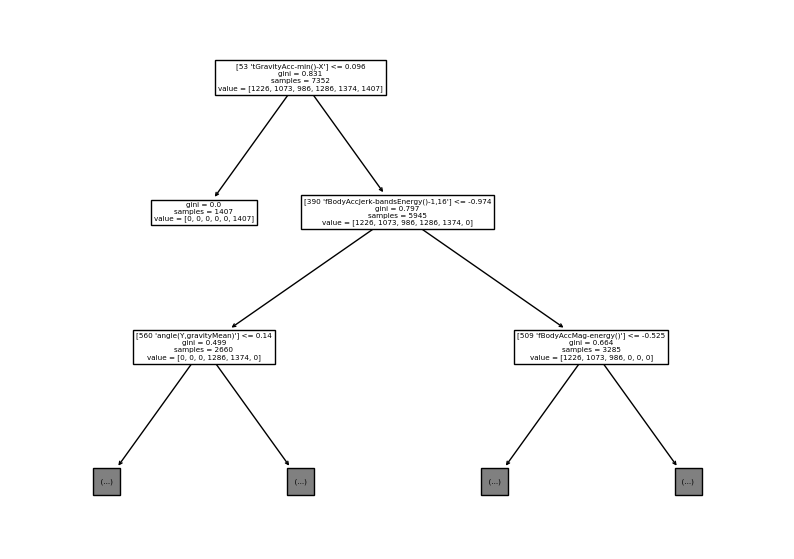

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth = 2, feature_names = feature_name_df.to_numpy())
plt.show()

In [13]:
train_input = x_train.to_numpy()
train_target = y_train.to_numpy()
test_input = x_test.to_numpy()
test_target = y_test.to_numpy()

In [14]:
train_input.shape

(7352, 561)

In [15]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [16]:
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size = 0.2,random_state = 42)

In [17]:
print(train_input.shape, train_target.shape)
print(val_input.shape, val_target.shape)

(5881, 561) (5881, 1)
(1471, 561) (1471, 1)


In [18]:
train_target= train_target.reshape(-1)
val_target = val_target.reshape(-1)

In [19]:
print(train_target[:10])
print(train_input.shape, train_target.shape)
print(val_input.shape, val_target.shape)

[6 2 2 5 5 1 4 5 2 3]
(5881, 561) (5881,)
(1471, 561) (1471,)


In [84]:
dense1 = keras.layers.Dense(64, activation = 'sigmoid')
dense2 = keras.layers.Dense(10, activation = 'softmax') #분류개수가 6가지.. 
model = keras.Sequential()
model.add(keras.layers.Conv1D(16, 3, activation = 'relu', input_shape =(561,1)))
model.add(keras.layers.MaxPooling1D(2))
model.add(keras.layers.Conv1D(16, 3, activation='relu'))
model.add(keras.layers.MaxPooling1D(2))
model.add(keras.layers.Flatten())
model.add(dense1)
model.add(keras.layers.Dropout(0.2))
model.add(dense2)
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [85]:
model.fit(train_input, train_target, epochs=5, validation_data = (val_input, val_target))

Epoch 1/5
184/184 [==============================] - 3s 11ms/step - loss: 0.8775 - accuracy: 0.6683 - val_loss: 0.3640 - val_accuracy: 0.8878
Epoch 2/5
184/184 [==============================] - 2s 11ms/step - loss: 0.3207 - accuracy: 0.8789 - val_loss: 0.3207 - val_accuracy: 0.8613
Epoch 3/5
184/184 [==============================] - 2s 11ms/step - loss: 0.2190 - accuracy: 0.9150 - val_loss: 0.1670 - val_accuracy: 0.9381
Epoch 4/5
184/184 [==============================] - 2s 10ms/step - loss: 0.1752 - accuracy: 0.9298 - val_loss: 0.1299 - val_accuracy: 0.9511
Epoch 5/5
184/184 [==============================] - 2s 11ms/step - loss: 0.1433 - accuracy: 0.9456 - val_loss: 0.1185 - val_accuracy: 0.9511


In [86]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 559, 16)           64        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 279, 16)          0         
 )                                                               
                                                                 
 conv1d_8 (Conv1D)           (None, 277, 16)           784       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 138, 16)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2208)              0         
                                                                 
 dense_45 (Dense)            (None, 64)              

In [68]:
model.predict(val_input[:10])

1/1 [==============================] - 0s 20ms/step


array([[8.66121991e-06, 2.73238227e-04, 1.65900383e-02, 9.83002245e-01,
        3.46882225e-05, 8.15712247e-06, 5.81942586e-05, 9.40060727e-06,
        5.61687739e-06, 9.82636084e-06],
       [6.75913270e-06, 5.74845821e-04, 3.42606287e-03, 9.95920300e-01,
        2.87765597e-05, 1.00124125e-05, 1.64421599e-05, 5.08812536e-06,
        5.63017238e-06, 6.06821550e-06],
       [4.74531862e-06, 9.96998787e-01, 1.14551303e-03, 1.31439336e-03,
        2.96671118e-04, 2.05919074e-04, 2.35544394e-05, 3.68706446e-06,
        2.60053002e-06, 4.11563497e-06],
       [1.30687522e-05, 3.55362950e-04, 4.87039506e-04, 1.51944096e-05,
        8.66348207e-01, 1.29719645e-01, 3.01231025e-03, 1.57983905e-05,
        2.17647794e-05, 1.15458561e-05],
       [1.31011211e-05, 1.87456433e-03, 4.81648603e-03, 9.93166864e-01,
        3.01088367e-05, 2.58287164e-05, 4.20384895e-05, 7.90282229e-06,
        1.01540072e-05, 1.29031496e-05],
       [2.40264671e-05, 9.81634974e-01, 1.09335752e-02, 5.33484295e-03,
   

In [70]:
val_target[:1]

array([3], dtype=int64)